<h1>Data Wrangling Practice-Part 2</h1> 

<h2>Table of content</h2>


1. Binning<br>
2. Indicator variable<br>


Estimated Time Read: <strong>10 min</strong>


In [81]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np



In [82]:
# the clean_df.csv 
filename = "clean_df.csv"

In [83]:
# Take a look of the original file

df = pd.read_csv(filename)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495,11.190476
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500,11.190476
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500,12.368421
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950,9.791667
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450,13.055556


### Binning is converting numeric variable into categorical bins for analysis

In [84]:
# convert the dtype from object to integer
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0, 0.5, 'count')

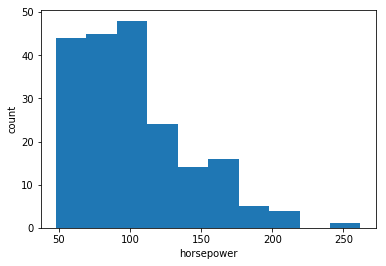

In [85]:
# Have a glance of the horsepower histogram 

plt.hist(df["horsepower"])

# set x,y labels 
plt.xlabel("horsepower")
plt.ylabel("count")


In [86]:
#  build a bin array with a minimum value, a maximum value and bandwidth
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [87]:
# cut function for assigning the group_names to different horsepower values 
group_names = ['Low', 'Medium', 'High']
df['binned-horsepower'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','binned-horsepower']].head(10)

,horsepower,binned-horsepower
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [88]:
df["binned-horsepower"].value_counts()

Low       153
Medium     43
High        5
Name: binned-horsepower, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

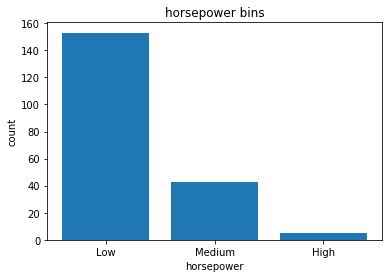

In [89]:

# plot a bar chart of each bin.
plt.bar(group_names, df["binned-horsepower"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

### Get indicator variables and assign it to data frame

In [90]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,binned-horsepower
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000.0,21,27,13495,11.190476,Low
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000.0,21,27,16500,11.190476,Low
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154,5000.0,19,26,16500,12.368421,Medium
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102,5500.0,24,30,13950,9.791667,Low
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115,5500.0,18,22,17450,13.055556,Low


In [91]:
# make indicator/dummy variable in 'fuel-type', that shows 0 and 1 in gas and diesel 
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [92]:
# rename the columns -diesel and gas 
dummy_variable_1.rename(columns={'diesel':'fuel_type_diesel', 'gas':'fuel_type_gas'}, inplace=True)
dummy_variable_1.head()

,fuel_type_diesel,fuel_type_gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [93]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)



In [94]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,binned-horsepower,fuel_type_diesel,fuel_type_gas
0,0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,9.0,111,5000.0,21,27,13495,11.190476,Low,0,1
1,1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,...,9.0,111,5000.0,21,27,16500,11.190476,Low,0,1
2,2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,...,9.0,154,5000.0,19,26,16500,12.368421,Medium,0,1
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,10.0,102,5500.0,24,30,13950,9.791667,Low,0,1
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,8.0,115,5500.0,18,22,17450,13.055556,Low,0,1


In [ ]:
# drop fuel-type column
df.drop(['fuel-type'],axis=1,inplace=True)


In [98]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,binned-horsepower,fuel_type_diesel,fuel_type_gas
0,0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495,11.190476,Low,0,1
1,1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500,11.190476,Low,0,1
2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500,12.368421,Medium,0,1
3,3,2,164,audi,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950,9.791667,Low,0,1
4,4,2,164,audi,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450,13.055556,Low,0,1
